# Curso Deep Learning

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## Creando nuestro propio Churn Analysis 🤓📊

En este lab aprenderás:

* [Tensorflow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)
* Descargar un dataset, prepararlo, entrenarlo, realizar finetuning y guardarlo.


### 1) Descarga del dataset 🤓

Utilizaremos un conjunto de datos de un proveedor de Telecomunicaciones para su Programa de Retención.
<br>Para más detalle acá se puede ver el dataset de Kaggle: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=9c9541bac8f0ef09b90bff09a5ced8212d53c6ee3d5d04c139e44e7e174b7ac7
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosbustillo","key":"60aea5be8b60f01d6ee908af46ecd025"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s telco-customer-churn

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
blastchar/telco-customer-churn                                         Telco Customer Churn                                172KB  2018-02-23 18:20:00         303042       2906  0.88235295       
abdallahwagih/telco-customer-churn                                     Telco Customer Churn                                  1MB  2024-10-11 05:27:55           1077         39  0.88235295       
alfathterry/telco-customer-churn-11-1-3                                Telco customer churn (11.1.3+)                      513KB  2024-05-08 20:46:56           2290         47  1.0              
yeanzc/telco-customer-chu

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 34.8MB/s]


In [ ]:
!unzip '/content/telco-customer-churn.zip'

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


### 2) Preparación de la data 👌

#### 2.1) Instalamos las dependencias 🙌

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ccf82fa0bd7abe4ab67d07d95ea7591d083d9cc0aea9add2e4d47ddf580fddd8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

#### 2.2) Explorar Dataset 🔍

In [ ]:
!ls

kaggle.json  sample_data  telco-customer-churn.zip  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",")

**Tip:** Para visualizar todas las columnas del dataframe

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### 2.3) EDA (Análisis Exploratorio de Datos)

Visualizamos qué tenemos en el dataframe

In [ ]:
# Crear un resumen utilizando funciones nativas de pandas
def summarize_dataframe_with_pandas(df):
    summary = df.describe(include='all').T  # Descripción general
    summary['Type'] = df.dtypes  # Tipos de datos
    summary['Unique Values'] = df.nunique()  # Cantidad de valores únicos
    summary['Examples'] = df.apply(lambda col: col.dropna().unique()[:3])  # Ejemplos de valores

    # Reorganizar columnas para mejor visualización
    summary = summary[['Type', 'Unique Values', 'Examples']]
    return summary

In [ ]:
summarize_dataframe_with_pandas(df)

,Type,Unique Values,Examples
customerID,object,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]"
gender,object,2,"[Female, Male]"
SeniorCitizen,int64,2,"[0, 1]"
Partner,object,2,"[Yes, No]"
Dependents,object,2,"[No, Yes]"
tenure,int64,73,"[1, 34, 2]"
PhoneService,object,2,"[No, Yes]"
MultipleLines,object,3,"[No phone service, No, Yes]"
InternetService,object,3,"[DSL, Fiber optic, No]"
OnlineSecurity,object,3,"[No, Yes, No internet service]"


Una visualización más detallada e interactiva

In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.4) Valores únicos

Eliminar columna con valores únicos

In [ ]:
df = df.drop('customerID', axis=1)

Eliminar columna con que puede generar Bias o Sesgo

In [ ]:
df = df.drop('gender', axis=1)

#### 2.5) Valores faltantes

In [ ]:
# Evaluar cantidad de valores faltantes
df.isnull().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


#### 2.6) Columnas Categóricas

Reeplazo de valores binarios en columnas categóricas

In [ ]:
# Evitar warning por uso de Replace
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
categorical_columns = list(df.select_dtypes(include='O').keys())

for i in categorical_columns:
    df[i] = df[i].replace('Yes', 1)
    df[i] = df[i].replace('No', 0)

Label Encoder

In [ ]:
# Inicializar y aplicar LabelEncoder único
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Codificar las columnas categóricas
    label_encoders[col] = le  # Guardar el codificador único para cada columna

In [ ]:
# Guardar los label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

#### 2.7) Columnas Numéricas

Escalar la data

In [ ]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']

scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [ ]:
# Guardar el escalado de datos
joblib.dump(scale, 'scaler.pkl')

['scaler.pkl']

### 3) Entrenamiento 💪

In [ ]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(xtrain.shape, ytrain.shape)

(5634, 18) (5634,)


In [ ]:
print(xtest.shape, ytest.shape)

(1409, 18) (1409,)


### 4) Red Neuronal 😨

In [ ]:
# Obtener el número de columnas de entrenamiento
num_columns = 18

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(num_columns,)),  # Capa de entrada con 18 características
    keras.layers.Dense(16, activation='relu'), # Primera capa oculta
    keras.layers.Dense(1, activation='sigmoid') # Capa de salida
])

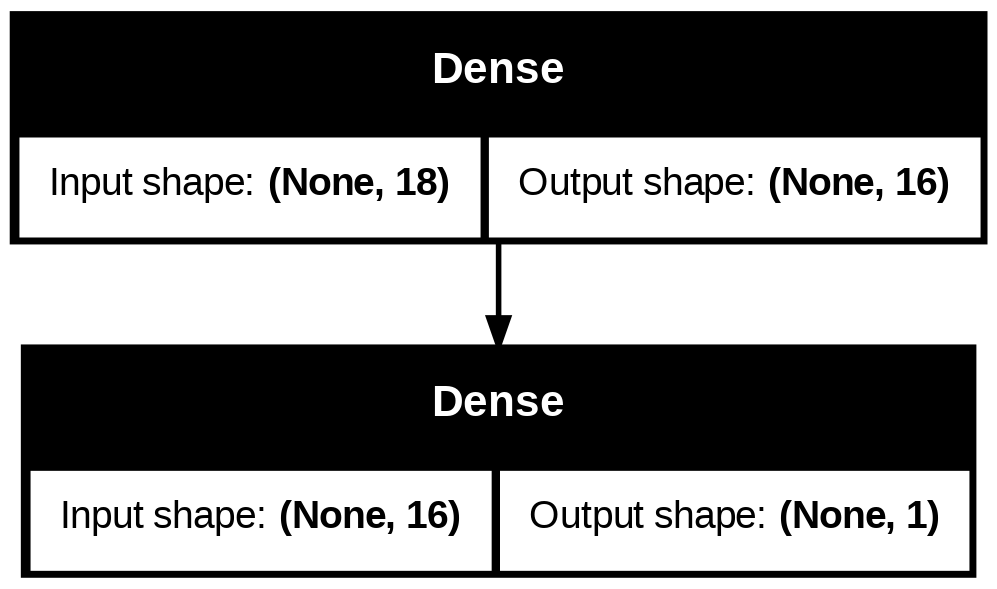

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adamW',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

**Probamos con 50 epochs**

In [ ]:
history = model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6962 - loss: 0.5550 - val_accuracy: 0.7282 - val_loss: 0.4787
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7518 - loss: 0.4649 - val_accuracy: 0.7736 - val_loss: 0.4443
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4435 - val_accuracy: 0.8020 - val_loss: 0.4290
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4284 - val_accuracy: 0.8006 - val_loss: 0.4237
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4323 - val_accuracy: 0.8020 - val_loss: 0.4204
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4248 - val_accuracy: 0.8048 - val_loss: 0.4182
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4173 - val_accuracy: 0.8070 - val_loss: 0.4174
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4279 - val_accuracy: 0

### 5) Métricas 📊

**Matriz de Confusión**

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


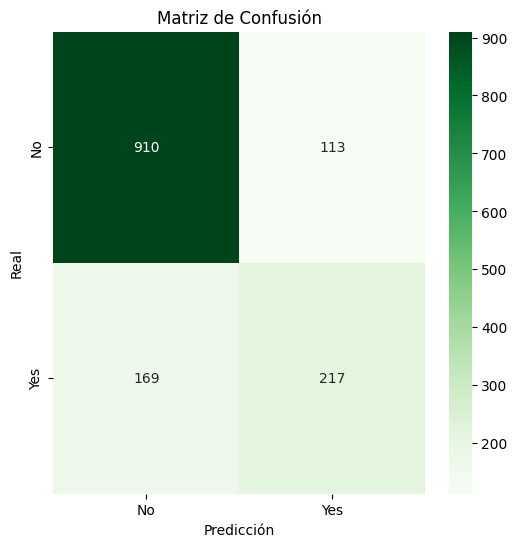

In [ ]:
y_pred = (model.predict(xtest) > 0.5)  # Convertir las probabilidades a 0 o 1
cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Reporte de Métricas**

In [ ]:
report = classification_report(ytest, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1023
         Yes       0.66      0.56      0.61       386

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



**Gráfica de Accuracy**

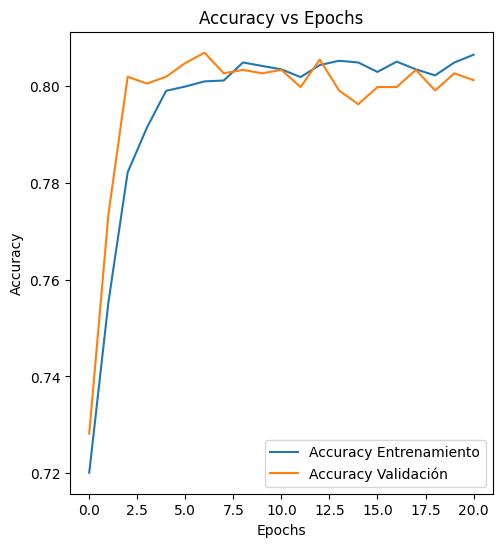

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Gráfica de Loss**

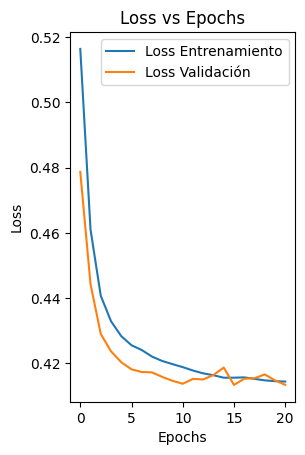

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Curva ROC**

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


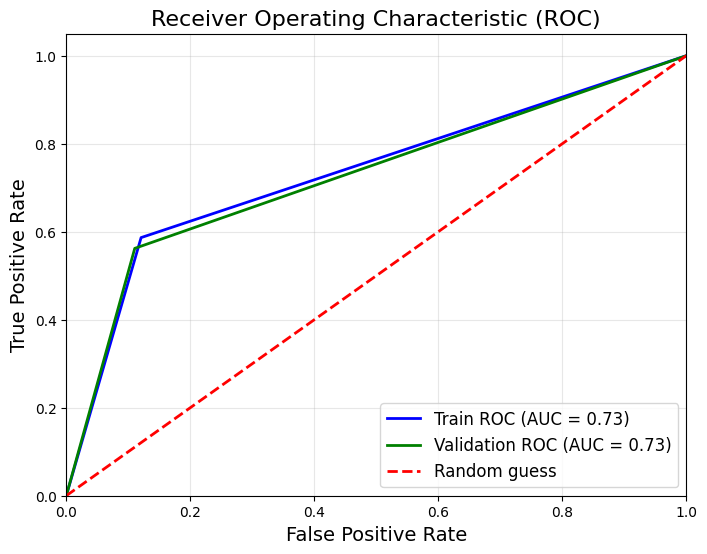

In [ ]:
# Obtener las predicciones de probabilidades
y_pred_train = (model.predict(xtrain) > 0.5)  # Convertir las probabilidades a 0 o 1

# Calcular las métricas de la curva ROC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(ytrain, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las métricas de la curva ROC para validación
fpr_val, tpr_val, _ = roc_curve(ytest, y_pred)
roc_auc_val = auc(fpr_val, tpr_val)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### 6) Guardar el modelo 💾

In [ ]:
# Guardar en formato HDF5
model.save('mi_modelo_entrenado.keras')

**El modelo pesa ~20 KB.**

### 7) Hacer Predicciones en Producción 🤙

In [ ]:
import joblib
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Cargar el modelo una vez (al inicio de la aplicación)

In [ ]:
# Cargar los objetos de preprocesamiento guardados
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')

# Cargar el modelo entrenado
model = load_model('mi_modelo_entrenado.keras', compile=False)

Función para predicción / inferencia

In [ ]:
# Función para preprocesar datos con los objetos guardados
def preprocess_data(df):
    # Eliminar columnas irrelevantes
    df = df.drop(['customerID', 'gender'], axis=1, errors='ignore')

    # Reemplazar valores "Yes"/"No" por 1/0
    categorical_columns = list(df.select_dtypes(include='O').keys())
    for i in categorical_columns:
        df[i] = df[i].replace('Yes', 1)
        df[i] = df[i].replace('No', 0)

    # Aplicar Label Encoding usando los objetos guardados
    for col, le in label_encoders.items():
        if col in df.columns:
            # Asegurar que los valores sean cadenas antes de la transformación
            df[col] = df[col].astype(str)
            try:
                df[col] = le.transform(df[col])
            except ValueError as e:
                raise ValueError(
                    f"Error al transformar la columna '{col}'. "
                    f"Asegúrate de que los valores en los nuevos datos coincidan con los datos de entrenamiento. "
                    f"Detalles: {e}"
                )

    # Aplicar escalado usando el scaler guardado
    scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    df[scale_cols] = scaler.transform(df[scale_cols])

    return df

In [ ]:
def make_prediction(single_case):
  # Convertir el caso único en DataFrame
  single_case_df = pd.DataFrame(single_case)

  # Preprocesar el caso único
  processed_single_case = preprocess_data(single_case_df)

  # Separar las características del target si aplica
  X_single_case = processed_single_case.drop('Churn', axis=1, errors='ignore')

  # Realizar predicción
  prediction = model.predict(X_single_case)

  score = prediction[0][0] * 100
  print(f"Probabilidad que abandone: {score:.2f} %")

  prediction_binary = (prediction > 0.5).astype(int)
  print("Churn: ", prediction_binary[0][0])

Ejemplos de uso

In [ ]:
# Churn: Yes / 1
single_case = {
    "customerID": ["9237-HQITU"],
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [2],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["Fiber optic"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["No"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [70.70],
    "TotalCharges": [151.65],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Probabilidad que abandone: 66.29 %
Churn:  1


In [ ]:
# Churn: No / 0
single_case = {
    "customerID": ["7795-CFOCW"],
    "gender": ["Male"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [45],
    "PhoneService": ["No"],
    "MultipleLines": ["No phone service"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["Yes"],
    "OnlineBackup": ["No"],
    "DeviceProtection": ["Yes"],
    "TechSupport": ["Yes"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["One year"],
    "PaperlessBilling": ["No"],
    "PaymentMethod": ["Bank transfer (automatic)"],
    "MonthlyCharges": [42.30],
    "TotalCharges": [1840.75],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probabilidad que abandone: 4.83 %
Churn:  0


In [ ]:
# Churn: No / 0
single_case = {
    "customerID": ["7590-VHVEG"],
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["Yes"],
    "Dependents": ["No"],
    "tenure": [1],
    "PhoneService": ["No"],
    "MultipleLines": ["No phone service"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [29.85],
    "TotalCharges": [29.85],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probabilidad que abandone: 59.86 %
Churn:  1


In [ ]:
# Churn: Yes / 1
single_case = {
    "customerID": ["3668-QPYBK"],
    "gender": ["Male"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [2],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["Yes"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Mailed check"],
    "MonthlyCharges": [53.85],
    "TotalCharges": [108.15],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probabilidad que abandone: 32.27 %
Churn:  0


### 8) Conclusiones

- Aprender sobre los distintos objetos y métodos que nos ofrece Tensorflow + Keras.

- Realizar el proceso completo de entrenamiento de un modelo con Tensorflow + Keras.

- Aprender tips sobre implementación con el uso de la GPU.

<br>
<br>
<br>

---

<br>
<br>


<img src="https://static.platzi.com/media/avatars/platziteam_8cfe6fc7-1246-4c9a-9f5d-d10d467443ee.png" width="100px">

[Platzi](https://platzi.com/) 🚀

